In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the dataset

url = "https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv"
data = pd.read_csv(url)
data.head(3)


C:\Users\gonza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no


In [3]:
#This is called Fixing the Rows and Columns. Let’s ignore the first two rows and load the data again.
data = pd.read_csv(url, skiprows=2)
data.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [4]:
#we’ll drop the customerid column and we’ll split the jobedu column into two other columns job and education and after that, we’ll drop the jobedu column as well.

# drop the customer id as it is of no use
data.drop("customerid", axis=1, inplace=True)

# extrac job & education from jobedu

In [5]:
data["job"] = data["jobedu"].apply(lambda x: x.split(",")[0])
data["education"] = data["jobedu"].apply(lambda x: x.split(",")[1])

# drop data["jobedu"] from de dataset
data.drop("jobedu", axis=1,inplace=True)
#print data
data.head(3)


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary


In [6]:
#checking the missing values
data.isnull().sum() /len(data)  *100

age          0.044237
salary       0.000000
balance      0.000000
marital      0.000000
targeted     0.000000
default      0.000000
housing      0.000000
loan         0.000000
contact      0.000000
day          0.000000
month        0.110593
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
response     0.066356
job          0.000000
education    0.000000
dtype: float64

In [7]:
# drop records with age missing in dataframe
data = data[~data["age"].isnull()].copy()
# cheking missing values after that
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [8]:
#Let’s impute values to the missing values for the month column.
#Since the month column is of an object type, let’s calculate the mode of that column and impute those values to the missing values.

In [9]:
data["month"].value_counts()

may, 2017    13740
jul, 2017     6885
aug, 2017     6235
jun, 2017     5333
nov, 2017     3967
apr, 2017     2930
feb, 2017     2646
jan, 2017     1402
oct, 2017      737
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [10]:
# another way to find mode
month_mode = data.month.mode()[0]
#fill missing values
data["month"].fillna(month_mode, inplace=True)


Handling the missing values in the Response column. Since, our target column is Response Column, if we impute the values to this column it’ll affect our analysis. So, it is better to drop the missing values from Response Column.

In [11]:
data = data[~data["response"].isnull()].copy()

In [12]:
#We have seen how to fix missing values, now let’s see how to handle outliers in the dataset.
data.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000
mean,40.935763,57004.849317,1362.850690,15.807024,2.763358,40.182015,0.580014
std,10.618790,32087.698810,3045.939589,8.322754,3.096964,100.079372,2.303563
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [13]:
#Categorical Unordered Univariate Analysis
#Now, let’s analyze the job category by using plots. Since Job is a category, we will plot the bar plot.
data["job"].value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

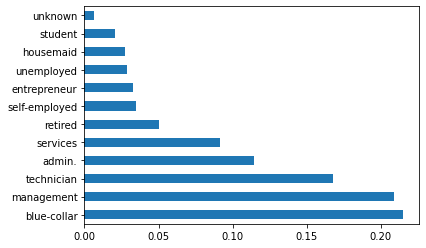

In [14]:
# plot bar percentage job
data["job"].value_counts(normalize=True).plot.barh()
plt.show()

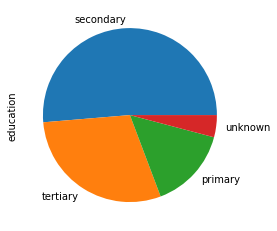

In [15]:
#Categorical Ordered Univariate Analysis:
#Now, let’s analyze the Education Variable from the dataset. Since we’ve already seen a bar plot, 
#let’s see how a Pie Chart looks like.
data.education.value_counts(normalize=True).plot.pie()
plt.show()

 Bivariate Analysis,
If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.

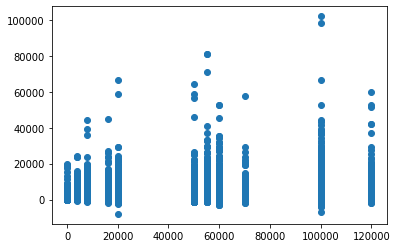

In [16]:
#Numeric-Numeric Analysis (scatter, pairplot, correlation matrix)
plt.scatter(data.salary,data.balance)
plt.show()

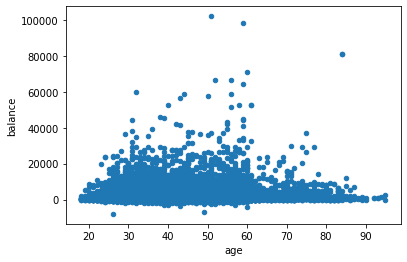

In [17]:
data.plot.scatter(x="age",y="balance")
plt.show()

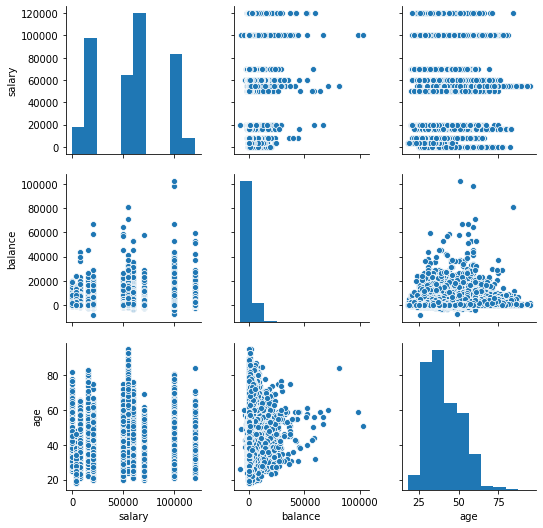

In [18]:
sns.pairplot(data, vars=["salary","balance","age"])
plt.show()

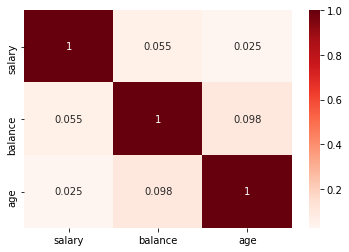

In [19]:
#correlation matrix
#First, we created a matrix using age, salary, and balance. 
#After that, we are plotting the heatmap using the seaborn library of the matrix.
sns.heatmap(data[["salary","balance","age"]].corr(),annot=True,cmap="Reds")
plt.show()

In [20]:
#Numeric - Categorical Analysis
#groupby the response to find the mean of the salary with response no & yes separately.
data.groupby("response")["salary"].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [21]:
data.response.nunique()

2

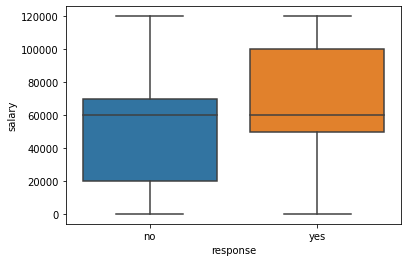

In [22]:
sns.boxplot(data["response"],data["salary"])
plt.show()

### Categorical — Categorical Analysis

Since our target variable/column is the Response rate, we’ll see how the different categories like Education, Marital Status, etc., are associated with the Response column. So instead of ‘Yes’ and ‘No’ we will convert them into ‘1’ and ‘0’, by doing that we’ll get the “Response Rate”.

In [23]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
data["response_rate"] = np.where(data["response"]=="yes",1,0)
data.response_rate.value_counts()



0    39876
1     5285
Name: response_rate, dtype: int64

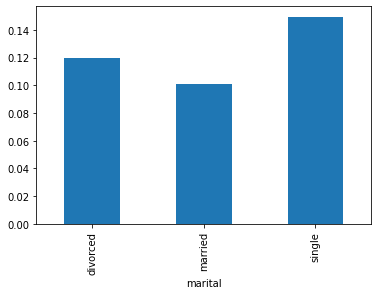

In [24]:

#plot the bar graph of marital status with average value of response_rate
data.groupby("marital")["response_rate"].mean().plot.bar()
plt.show()

### Multivariate Analysis

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [25]:
#If we analyze data by taking more than two variables/columns into consideration from a dataset,
#it is known as Multivariate Analysis.
#First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.
result = pd.pivot_table(data=data,index="education",columns="marital",values="response_rate")
print(result)

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


In [26]:
pd.pivot_table(data=data,index="education",columns="marital",values="response_rate").style.background_gradient(cmap='viridis')

marital,divorced,married,single
education,,,
primary,0.138852,0.0756014,0.106808
secondary,0.103559,0.0946496,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


### Direct Marketing (kaggle)

In [3]:
url = r"C:\Users\gonza\Downloads\DirectMarketing.csv"
df = pd.read_csv(url)
df.head(2)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318


In [4]:
# ver nulos
df.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

The “History” column contains 303 missing values. These are used to indicate a customer has not made purchase yet. We can check the other values in the column and then decide how to handle the missing values.

Since it is a categorical column, we can replace the missing values with the word “Nothing” that indicates no purchase has been made yet.

In [5]:
df.History.value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [6]:
df.History.fillna("Nothing",inplace=True)
df.History.isna().sum()

0

In [9]:
print(f"the average money spend is: {df.AmountSpent.mean()}; the median is: {df.AmountSpent.median()}")

the average money spend is: 1216.77; the median is: 962.0


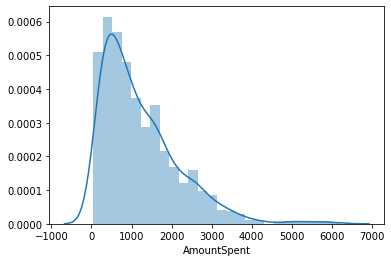

In [16]:
# The mean is much higher than the median which shows that this column does not have a normal distribution. There are outliers with high values. Thus, we expect the “AmountSpent” column to have a right skewed distribution.
sns.distplot(df.AmountSpent)

In [12]:
sns.__version__

'0.10.1'

In [18]:
df[["Age","AmountSpent"]].groupby("Age").mean()

,AmountSpent
Age,
Middle,1501.690945
Old,1432.126829
Young,558.623693


The average amount of money spent is much higher for middle and old aged people than for young people.

I also want to see if the campaign is more focused on older people. We can check the number of catalogs sent to each group along with average money spent.

In [21]:
df[["Age","AmountSpent","Catalogs"]].groupby("Age")["Catalogs","AmountSpent"].agg(["mean","count"])

Catalogs        AmountSpent      
             mean count         mean count
Age                                       
Middle  15.425197   508  1501.690945   508
Old     15.160976   205  1432.126829   205
Young   13.024390   287   558.623693   287

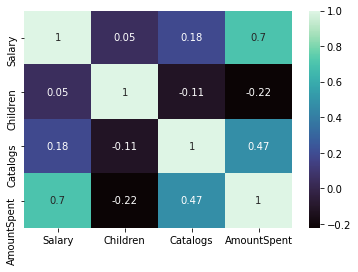

In [22]:
# Correlations between numerical variables
sns.heatmap(df.corr(),annot=True,cmap="mako")

In [24]:
#The correlation matrix shows a negative correlation between the number of children and spent amount. Thus, we expect to see a decreasing spent amount as the number of children increases.
df[["Age","AmountSpent","Children"]].groupby(["Age","Children"]).agg(["mean","count"])

AmountSpent      
                        mean count
Age    Children                   
Middle 0         1787.193939   165
       1         1634.469512   164
       2         1187.173469    98
       3         1031.802469    81
Old    0         1491.139037   187
       1          731.100000    10
       2         1025.166667     6
       3          640.500000     2
Young  0          692.163636   110
       1          540.354839    93
       2          353.690476    42
       3          454.261905    42

Gender and Marriage

We will check a couple of measures with the gender and marriage columns. The groupby function allows applying different aggregate functions to different columns. Furthermore, we can rename the columns of aggregations.

In [27]:
#The NamedAgg method is used to rename the columns. Another way to change the column names is the rename function of Pandas.
df[["Gender","AmountSpent","Catalogs","Married"]].groupby(["Gender","Married"]).agg(Average_number_of_catalogs=pd.NamedAgg("Catalogs","mean"),Total_purchase_amount=pd.NamedAgg("AmountSpent","sum"))

Average_number_of_catalogs  Total_purchase_amount
Gender Married                                                   
Female Married                   15.546667                 354529
       Single                    12.960854                 164293
Male   Married                   15.617329                 484850
       Single                    14.820276                 213098

In [28]:
# Modelo
X = df.iloc[:,:-1]
y = df["AmountSpent"]

In [29]:

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [50]:
from sklearn.preprocessing import StandardScaler
def prepocesado(X_train,y_train):
    
    categorical_transformer = Pipeline(steps=[("onehot",OneHotEncoder())])    
    categorical_features = df.select_dtypes(include="object").columns
    prepocessor = ColumnTransformer(transformers=[
                    ("cat",categorical_transformer,categorical_features)
    ])
    clasifiers = [linear_model.Lasso(alpha=0.1),DecisionTreeRegressor()]
    for clasifiers in clasifiers:
        pipe = Pipeline(steps=[("prepocessor",prepocessor),("clasifiers",clasifiers)])
        pipe.fit(X_train,y_train)
        print(f"model score: {pipe.score(X_train,y_train)}")


In [52]:
prepocesado(X_train,y_train)

model score: 0.5766205095828911
model score: 0.690008761982176


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
### PENDIENTE DE COMPROBAR
# ahora pruebo con gridsearch
def prepocesado_grid(X_train,y_train):
    
    categorical_transformer = Pipeline(steps=[("onehot",OneHotEncoder())])
    categorical_features = df.select_dtypes(include="object").columns
    prepocessor = ColumnTransformer(transformers=[
                    ("cat",categorical_transformer,categorical_features)
    ])
    clasifiers = [linear_model.Lasso(alpha=0.1),DecisionTreeRegressor(),RandomForestRegressor(max_depth=2, random_state=0)]
    
    parmeters = {"max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
                'alpha':[0.02, 0.024, 0.025, 0.026, 0.03,0.1,0.2,0.5,1]}

    for clasifiers in clasifiers:
        pipe = Pipeline(steps=[("prepocessor",prepocessor),("clasifiers",clasifiers)])
        search = GridSearchCV(pipe,parmeters,n_jobs=1)
        search.fit(X_train,y_train)
        print("Best parameter (CV score=%0.3f):" % search.best_score_)
        print(search.best_params_)

In [67]:
from sklearn.preprocessing import StandardScaler
def prepocesado_num(X_train,y_train):
    categorical_transformer = Pipeline(steps=[("onehot",OneHotEncoder())])
    categorical_features = df.select_dtypes(include="object").columns
    prepocessor = ColumnTransformer(transformers=[
                    ("cat",categorical_transformer,categorical_features)
    ])
    clasifiers = DecisionTreeRegressor(random_state=0)
    
    parmeters = {"max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],                
               }


    pipe = Pipeline(steps=[("prepocessor",prepocessor),("clasifiers",clasifiers)])
    search = GridSearchCV(pipe,parmeters,n_jobs=1)
    search.fit(X_train,y_train)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)



### diabetes dataset

In [2]:
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Pima Indians Diabetes Database\diabetes.csv"
df = pd.read_csv(url)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
# no esta balanceada
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

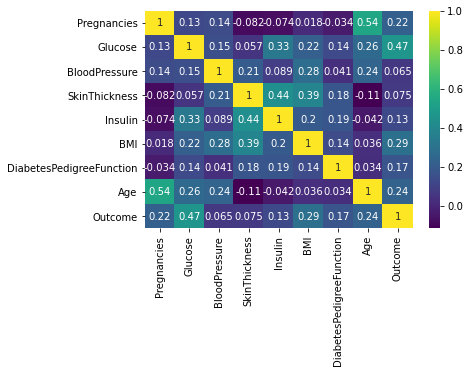

In [4]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [5]:
X = df.iloc[:,:-1]
y = df["Outcome"]

In [6]:
import statsmodels.api as sm
logic_model = sm.Logit(y,X)
result = logic_model.fit() 

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


In [7]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 18 Nov 2020   Pseudo R-squ.:                 0.05922
Time:                        12:35:00   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=0)
lm = linear_model.LogisticRegression(class_weight="balanced")
lm.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

In [10]:
prediction = lm.predict(X_train)
metrics.accuracy_score(Y_train,prediction)

0.7616387337057728

In [11]:
print(metrics.classification_report(Y_train,prediction))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       343
           1       0.65      0.74      0.69       194

    accuracy                           0.76       537
   macro avg       0.74      0.76      0.75       537
weighted avg       0.77      0.76      0.76       537



In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
n_estimators = [("rf",rf),("log",lm)]
esemble = VotingClassifier(n_estimators,voting="hard")

In [15]:
esemble.fit(X_train,Y_train)
esemble.score(X_train,Y_train)

0.9068901303538175

In [16]:
esemble.score(X_test,Y_test)

0.7705627705627706

In [23]:
pd.DataFrame(data={"coef":lm.coef_.flatten(),"columnas":X.columns.values.tolist()}).sort_values(by="coef",ascending=False)

,coef,columnas
6,0.831822,DiabetesPedigreeFunction
0,0.103189,Pregnancies
5,0.092732,BMI
1,0.032213,Glucose
7,0.027052,Age
3,0.003599,SkinThickness
4,-0.000915,Insulin
2,-0.011909,BloodPressure


In [24]:
# outliers
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
mask = yhat != -1

In [31]:
X_train, Y_train = X_train.iloc[mask, :], Y_train[mask]

In [32]:
esemble = VotingClassifier(n_estimators,voting="hard")
esemble.fit(X_train,Y_train)
esemble.score(X_train,Y_train)

0.9109730848861284

In [33]:
esemble.score(X_test,Y_test)

0.7748917748917749